In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
homedir=os.getenv('HOME')
from astropy.table import Table

#### Load NED-LVS Table

In [42]:
t=Table.read(homedir+'/Desktop/wisesize/archive_tables/NEDLVS_20210922_v2.fits')

#isolating all objects with a. "galaxy" objtype
t_gal = t[t['objtype']=='G']

In [56]:
print(f"Fraction of galaxies with Mstar measurements: {len(t[~t['Mstar'].mask])/len(t):.2f}")
print(f"Fraction of galaxies with SFR(W4) measurements: {len(t[~t['SFR_W4'].mask])/len(t):.2f}")
print(f"Fraction of galaxies with SFR(W4+UV) measurements: {len(t[~t['SFR_hybrid'].mask])/len(t):.2f}")

Fraction of galaxies with Mstar measurements: 0.88
Fraction of galaxies with SFR(W4) measurements: 0.88
Fraction of galaxies with SFR(W4+UV) measurements: 0.36


#### SFR v. Mstar

In [16]:
sfr_hybrid = t_gal['SFR_hybrid']
mstar = t_gal['Mstar']

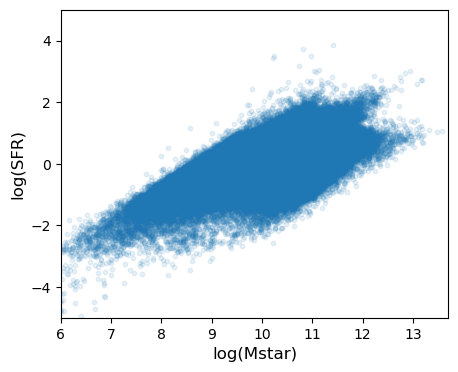

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(np.log10(mstar),np.log10(sfr_hybrid),s=10,alpha=0.1)
plt.xlabel('log(Mstar)',fontsize=12)
plt.ylabel('log(SFR)',fontsize=12)
plt.xlim(6,13.7)
plt.ylim(-5,5)
plt.show()

#### Mass Completeness Steps

##### Summarized:
0. Apply all other 'cuts' to sample, if any. Mass completeness should come LAST.
    * sSFR, W3 S/N, size, morphology, etc. 

1. Select galaxies near z$_{max}$ = 0.025 (the upper end of our sample). Try to ensure ~400-500 galaxies in this collection.


2. From this group, select galaxies with -0.5 < m-m$_r$ < -1.0, where m$_r$ = 17.77 (SDSS apparent magnitude limit)
    * this bright subsample at the far end of our redshift distribution is far enough above the magnitude completeness limit so as to be equally complete for all r-band M/L. 


3. Compute $\Delta$m=m-m$_r$ and $\frac{L_{scale}}{L} = 10^{-0.4(-\Delta m)}$, where L$_{scale}$ is the scale luminosity. Note both luminosities are in the r-band. Then, calculate $\frac{M_{*,scale}}{M_*} = 10^{-0.4(-\Delta m)}$. 
    * we fade the galaxies and reduce their masses such that they lie at the m_r limit of our survey AND the ratios are unchanged: M/L = Mscale/Lscale
    * e.g., if the galaxy is 1 mag brighter than m_r, we reduce the stellar mass AND luminosity by a factor of 2.5. THIS is what those scaled variables do.
    * creates a synthetic pool of galaxies from this bright subsample that have the full range of M/L but are at our magnitude limit. 

4. L$_{scale}$, the luminosity of objects at apparent magnitude limit at the highest redshift limit of our sample, should be same for all galaxies in our subsample. DIFFERENT M$_{scale}$ --> we have a range of masses with ~same luminosity


5. Compute the distribution of M$_{*,scale}$ and find the upper 90th or 95th percentile --> corresponds to the ~highest M/L at $L_{scale}$
    * used the subsample to estimate how massive (M$_*$) a galaxy at our apparent magnitude limit must be in order to be detected regardless of M/L

-----

##### A Few Notes
* Without any corrections, we will only detect, close to our magnitude limit, low M/L galaxies (young stellar populations...much more luminosity for a given mass)
* THE GOAL is to find, at the upper redshift limit of our sample, the mass at and above which all M/L are visible
* Use bright subsample to estimate how massive a galaxy at our apparent magnitude limit must be in order to be detected regardless of M/L
  * To do so...calculate amount of fading required to bring each galaxy in the subsample to the magnitude limit of r=17.7
  * Then decrease the stellar masses by the same factor
  * The resulting stellar mass distribution has, by construction, identical apparent magnitudes and luminosities -- represents the intrinsic distribution in M/L (and hence in M*) for galaxies at our magnitude limit

#### Mass Completeness (for real)

##### 0. Apply any needed cuts to sample

In [61]:
# sSFR > -11.5
# S/N (W3) > 20
# SFR > [insert limit here]
# Morphology cut (before or after?)
# etc.

##### 1. Select galaxies near z$_{max}$. Try |z$_{max}$-z| < 0.05z$_{max}$.

In [65]:
z=t_gal['z']
zmax=0.025
zflag = (np.abs(zmax-z)<0.05*zmax)

In [72]:
#m_J, Lum_J; m_W1, Lum_W1; Mstar; MLratio
#apparent magnitudes in Vega system, luminosities in erg/sec

#use m_j of 16.6 for apparent magnitude limit as a test

2. From the group above, select galaxies with -0.5 < m-m$_r$ < -1.0

3. Compute the scale factors, M$_{scale}$ and L$_{scale}$

4. Arrange distribution of M$_{scale}$, find upper 90-95th percentile